In [68]:
import numpy as np
import plot
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import corner
from matplotlib.patches import Rectangle

In [2]:
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#rc('font',**{'family':'serif'})
#rc('text', usetex=True)

In [3]:
ndim = 3
nwaves = 3

In [262]:
EL = np.loadtxt('data/3D_historymatch_ellipsoid_samples.txt').reshape((nwaves*8000,4))
HC = np.loadtxt('data/3D_historymatch_hypercube_samples.txt').reshape((nwaves*8000,4))
HC_r = np.loadtxt('data/3D_historymatch_hypercube_r_samples.txt').reshape((nwaves*8000,4))
#HM_data_EL_12 = np.loadtxt('3D_historymatch_ellipsoid_12z.txt').reshape((nwaves*5000,4))
#HM_data_EL_test = np.loadtxt('data/3D_historymatch_ellipsoid_8z_test.txt').reshape((nwaves*5000,4))
#HM_data_HC = np.loadtxt('data/3D_historymatch_hypercube.txt').reshape((nwaves*5000,4))

HC_w1 = np.loadtxt('data/3D_historymatch_hypercube_w1.txt')
HC_w2 = np.loadtxt('data/3D_historymatch_hypercube_w2.txt')
HC_w3 = np.loadtxt('data/3D_historymatch_hypercube_w3.txt')

HC_r_w1 = np.loadtxt('data/3D_historymatch_hypercube_w1.txt')
HC_r_w2 = np.loadtxt('data/3D_historymatch_hypercube_w2.txt')
HC_r_w3 = np.loadtxt('data/3D_historymatch_hypercube_w3.txt')

EL_w1 = np.loadtxt('data/3D_historymatch_ellipsoid_w1.txt')
EL_w2 = np.loadtxt('data/3D_historymatch_ellipsoid_w2.txt')
EL_w3 = np.loadtxt('data/3D_historymatch_ellipsoid_w3.txt')

#HM_data_EL_true_output = np.loadtxt('data/3D_historymatch_ellipsoid_8z_true_output.txt')
#HM_data_EL_emulator_output = np.loadtxt('data/3D_historymatch_ellipsoid_8z_emulator_output.txt')

HC_true_output = np.loadtxt('data/3D_HC_true_output.txt')
HC_emulator_output = np.loadtxt('data/3D_HC_emulator_output.txt')

Itrain = np.loadtxt('data/EL_Itrain.txt')
Idata = np.loadtxt('data/EL_Idata.txt')


analytic_mean = np.loadtxt("3D_analytic_mean.txt").reshape(3,)
analytic_cov = np.loadtxt("3D_analytic_cov.txt").reshape(3,3)
H = analytic_cov


155
(24000,)


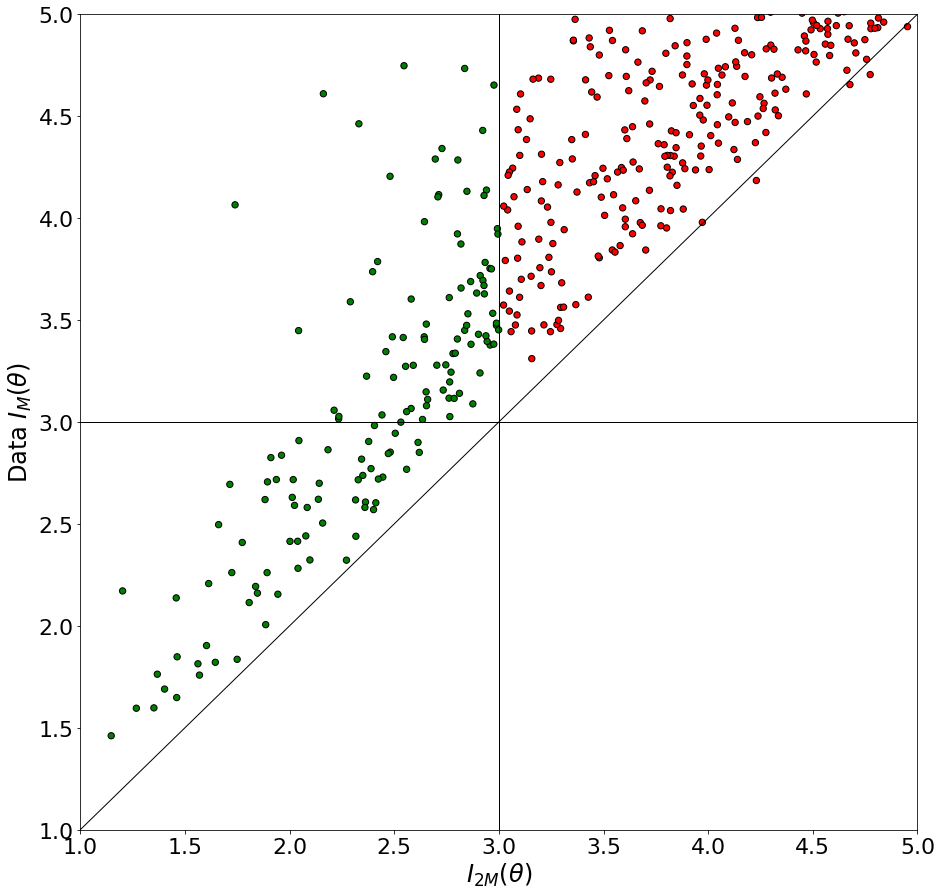

In [218]:
fig, ax = plt.subplots(figsize=(15,15))

col = np.where(Itrain[:8000]<3,'g','r')
print(len(np.where(Itrain[:8000]<3)[0]))

ax.scatter(Itrain[:8000], Idata[:8000], s=40, color=col, edgecolor='black')
x = np.linspace(0,40,100)
#ax.set_xlim([0,np.max(Itrain[:100])])
#ax.set_ylim([0,np.max(Idata[:100])])
ax.set_xlim([1,5])
ax.set_ylim([1,5])
ax.plot(x, x, color='black', linewidth=1)
ax.axvline(3, color='black', linewidth=1)
ax.axhline(3, color='black', linewidth=1)
print(Idata.shape)

ax.set_ylabel(r'Data $I_{M}(\theta)$')
ax.set_xlabel(r'$I_{2M}(\theta)$')
plt.savefig('figures/implausibilities.png', bbox_inches='tight', facecolor='white', transparent=False)



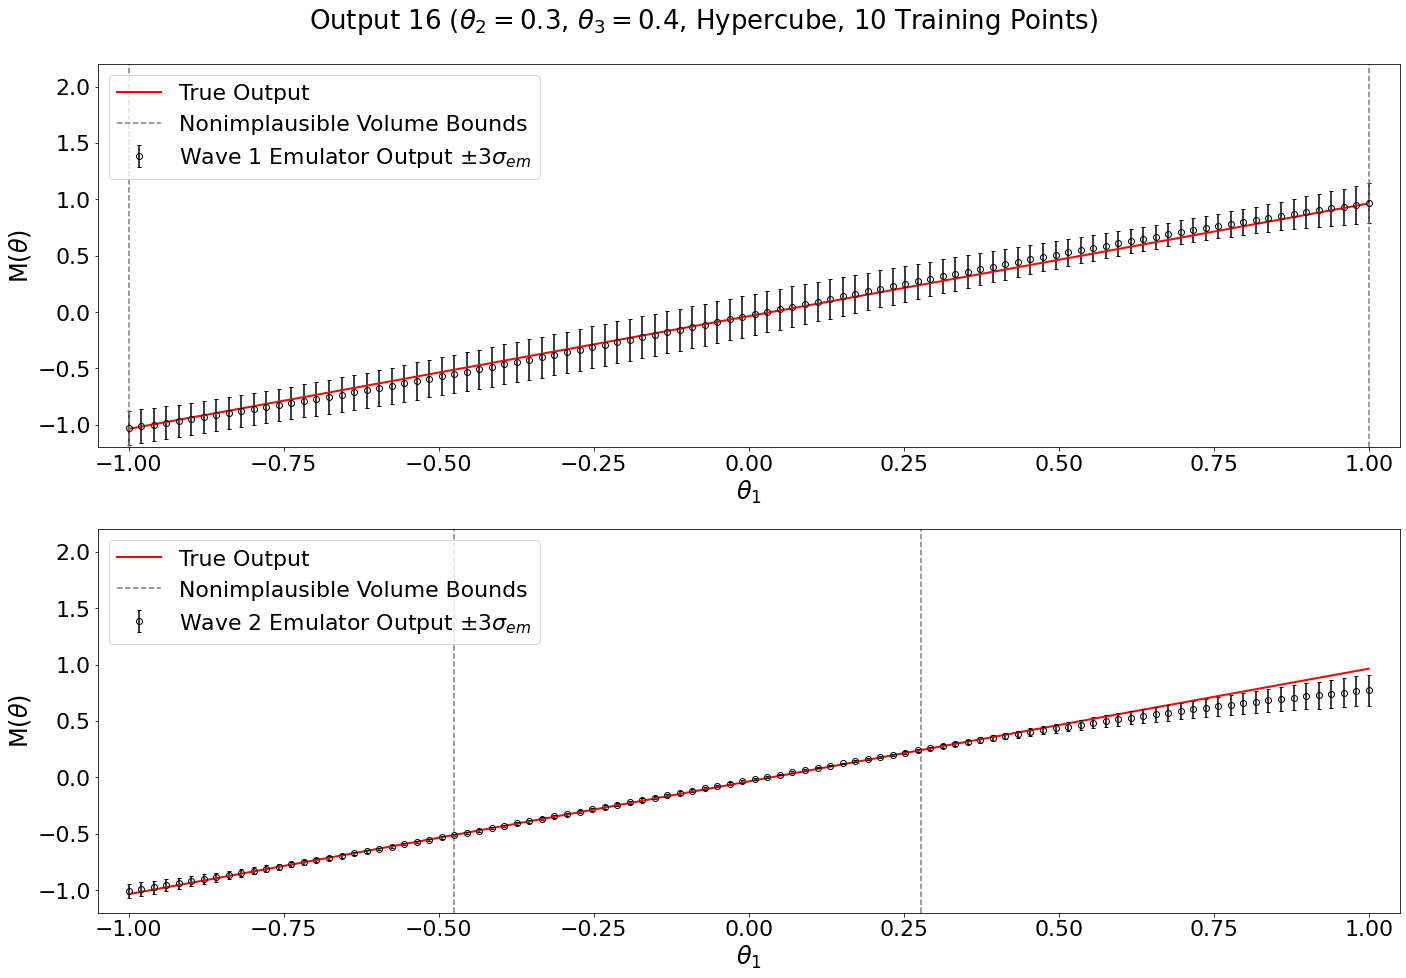

In [106]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(20,14))

#mu_EL = HM_data_EL_emulator_output[:,0][:100]
#sd_EL = HM_data_EL_emulator_output[:,0][:100]

mu_HC = HC_emulator_output[:,0]
sd_HC = HC_emulator_output[:,1]

ax1.plot(np.linspace(-1,1,100), HC_true_output[:100], linewidth=2, color = 'red', label='True Output')
ax1.errorbar(np.linspace(-1,1,100), mu_HC[:100], yerr=3*sd_HC[:100], color='black', fmt='o', mfc='None', capsize=2, label=r'Wave 1 Emulator Output $\pm 3\sigma_{em}$')
ax1.axvline(-1, color='grey', linestyle='--', label='Nonimplausible Volume Bounds')
ax1.axvline(1, color='grey', linestyle='--')
ax1.set_xlabel(r'$\theta_{1}$')
ax1.set_ylabel(r'M($\theta$)')
ax1.legend(loc='upper left')
ax1.set_ylim([-1.2,2.2])
ax1.set_xlim([-1.05,1.05])

ax2.plot(np.linspace(-1,1,100), HC_true_output[100:200], linewidth=2, color = 'red', label='True Output')
ax2.errorbar(np.linspace(-1,1,100), mu_HC[100:200], yerr=3*sd_HC[100:200], color='black', fmt='o', mfc='None', capsize=2, label=r'Wave 2 Emulator Output $\pm 3\sigma_{em}$')
ax2.axvline(np.min(HC_w1[:,0].T[:-1]), color='grey', linestyle='--', label='Nonimplausible Volume Bounds')
ax2.axvline(np.max(HC_w1[:,0].T[:-1]), color='grey', linestyle='--')
ax2.set_xlabel(r'$\theta_{1}$')
ax2.set_ylabel(r'M($\theta$)')
ax2.legend(loc='upper left')
ax2.set_ylim([-1.2,2.2])
ax2.set_xlim([-1.05,1.05])


fig.suptitle(r'Output 16 ($\theta_{2}=0.3$, $\theta_{3}=0.4$, Hypercube, 10 Training Points)')
plt.tight_layout()
#plt.savefig('figures/emulator_output_HC.png', bbox_inches='tight', facecolor='white', transparent=False)




In [7]:
#wave2_EL_8 = HM_data_EL_8[5000:10000]
#wave1_EL_8 = HM_data_EL_8[:5000]



#final_wave_EL_8 = HM_data_EL_8[(nwaves-1)*5000:]
#final_wave_EL_12 = HM_data_EL_12[(nwaves-1)*5000:]
#final_wave_EL_test = HM_data_EL_test[(nwaves-1)*5000:]

#wave1_HC = HM_data_HC[:5000]
#wave2_HC = HM_data_HC[5000:10000]

#final_wave_HC = HM_data_HC[(nwaves-1)*5000:]

In [107]:
theta_0_bound = np.array([-1, 1]).reshape(1,-1)
theta_1_bound = np.array([-1, 1]).reshape(1,-1)
theta_2_bound = np.array([-1, 1]).reshape(1,-1)
parameter_bounds = np.concatenate((theta_0_bound, theta_1_bound, theta_2_bound), axis=0)

theta_0_vals = np.linspace(parameter_bounds[0,0], parameter_bounds[0,1], 100)
theta_1_vals = np.linspace(parameter_bounds[1,0], parameter_bounds[1,1], 100)
theta_2_vals = np.linspace(parameter_bounds[2,0], parameter_bounds[2,1], 100)
theta_vals = np.concatenate((theta_0_vals.reshape(1,-1), theta_1_vals.reshape(1,-1), theta_2_vals.reshape(1,-1)), axis=0)

In [108]:
def get_cov_ellipse(cov, centre, nstd, chi, ax, color):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * np.sqrt(chi*np.abs(eigvals))
    
    
    
    t = np.linspace(0, 2*np.pi, 100)
    Ell = np.array([0.5*width*np.cos(t) , 0.5*height*np.sin(t)]) 
    R_rot = np.array([[np.cos(theta) , -np.sin(theta)],[np.sin(theta), np.cos(theta)]])  
    Ell_rot = np.zeros((2,Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])
    
    ax.plot( centre[0]+Ell_rot[0,:] , centre[1]+Ell_rot[1,:], linewidth='3', color=color)

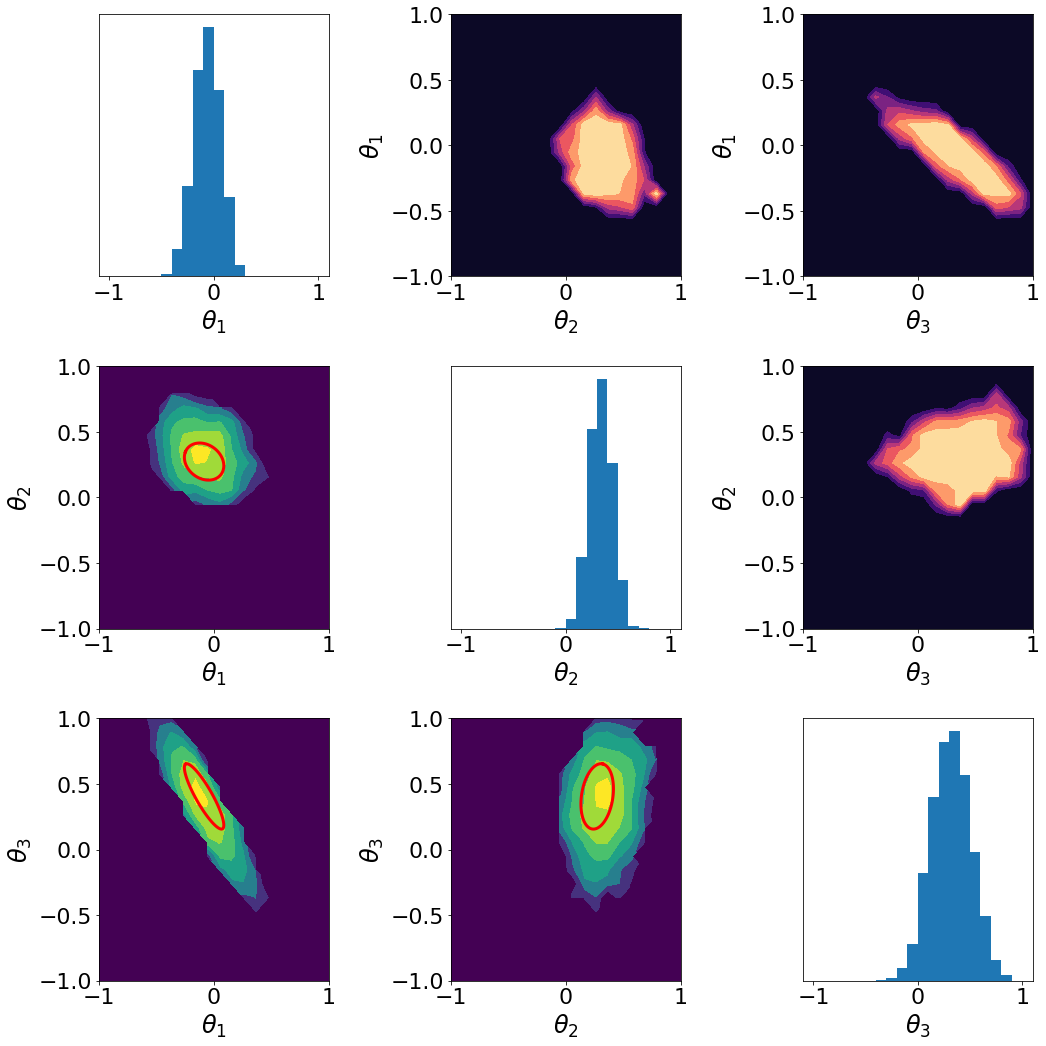

In [110]:
fig, axes = plt.subplots(ndim,ndim,figsize=(15,15))

plot.plotcorner(EL[16000:24000], parameter_bounds, 3, Fig=(fig,axes), labels=(r'$\theta_{1}$', r'$\theta_{2}$', r'$\theta_{3}$'))
get_cov_ellipse(np.array([[H[0,0], H[0,1]],[H[1,0], H[1,1]]]), [analytic_mean[0], analytic_mean[1]], 3, 10.597,  axes[1,0], color = 'red')
get_cov_ellipse(np.array([[H[0,0], H[0,2]],[H[2,0], H[2,2]]]), [analytic_mean[0], analytic_mean[2]], 3, 10.597, axes[2,0], color = 'red')
get_cov_ellipse(np.array([[H[1,1], H[1,2]],[H[2,1], H[2,2]]]), [analytic_mean[1], analytic_mean[2]], 3, 10.597, axes[2,1], color = 'red')

#plt.savefig('figures/final_wave_corner', bbox_inches='tight', facecolor='white', transparent=False)

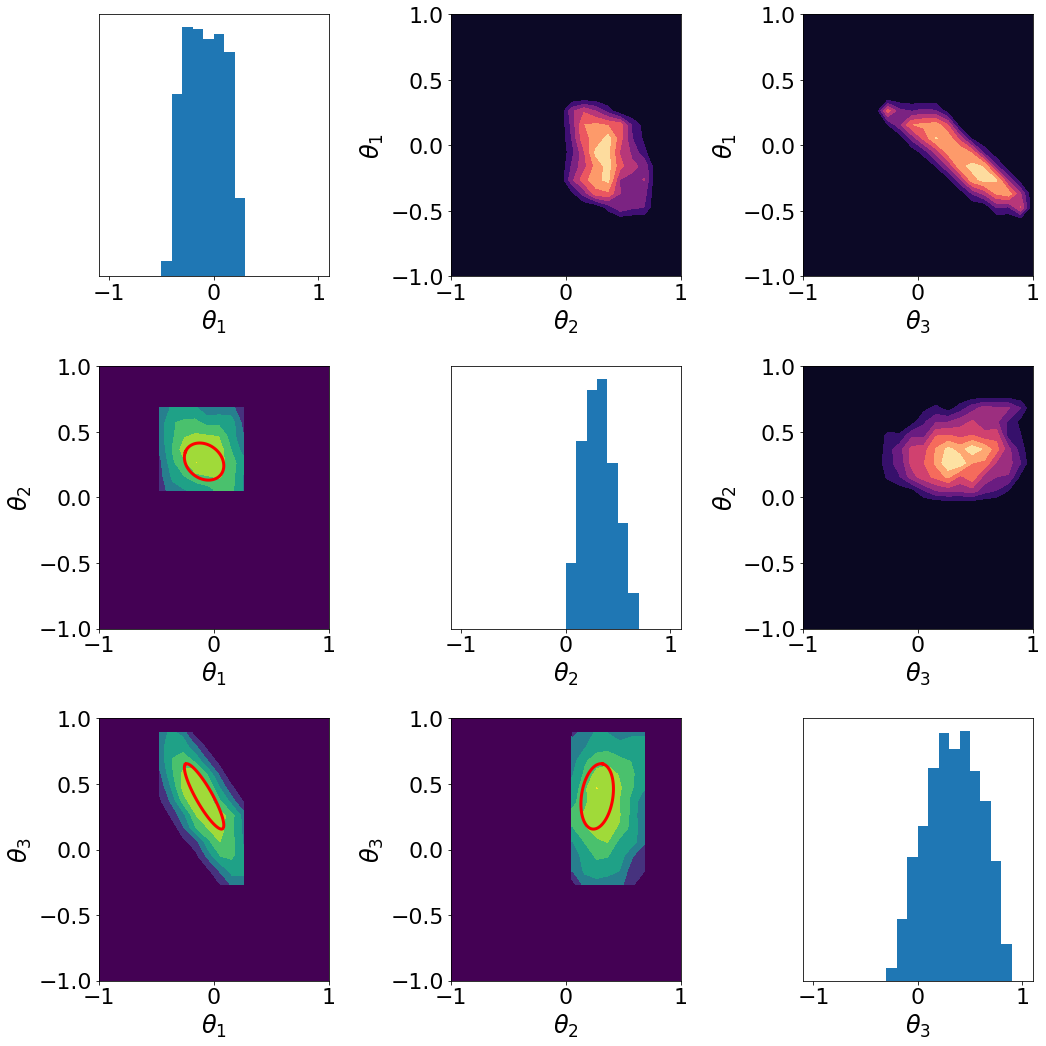

In [112]:
fig, axes = plt.subplots(ndim,ndim,figsize=(15,15))

plot.plotcorner(HC[16000:24000], parameter_bounds, 3, Fig=(fig,axes), labels=(r'$\theta_{1}$', r'$\theta_{2}$', r'$\theta_{3}$'))
get_cov_ellipse(np.array([[H[0,0], H[0,1]],[H[1,0], H[1,1]]]), [analytic_mean[0], analytic_mean[1]], 3, 10.597, axes[1,0], color = 'red')
get_cov_ellipse(np.array([[H[0,0], H[0,2]],[H[2,0], H[2,2]]]), [analytic_mean[0], analytic_mean[2]], 3,10.597,  axes[2,0], color = 'red')
get_cov_ellipse(np.array([[H[1,1], H[1,2]],[H[2,1], H[2,2]]]), [analytic_mean[1], analytic_mean[2]], 3, 10.597, axes[2,1], color = 'red')

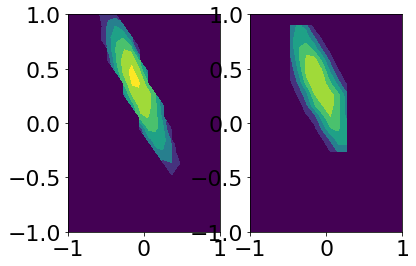

In [113]:
EL_13 = np.concatenate((EL[16000:24000][:,0].reshape(-1,1), EL[16000:24000][:,2].reshape(-1,1)),axis=1)
HC_13 = np.concatenate((HC[16000:24000][:,0].reshape(-1,1), HC[16000:24000][:,2].reshape(-1,1)),axis=1)

fig, (ax1,ax2) = plt.subplots(1,2)
plot.plot_implausibility2D(EL[16000:24000], parameter_bounds, [0,2], bins=20, Fig=(fig,ax1), labels=None, plot_kwargs=None)
plot.plot_implausibility2D(HC[16000:24000], parameter_bounds, [0,2], bins=20, Fig=(fig,ax2), labels=None, plot_kwargs=None)

-0.0832421425144813
0.2738720593225429
0.40537014223043655


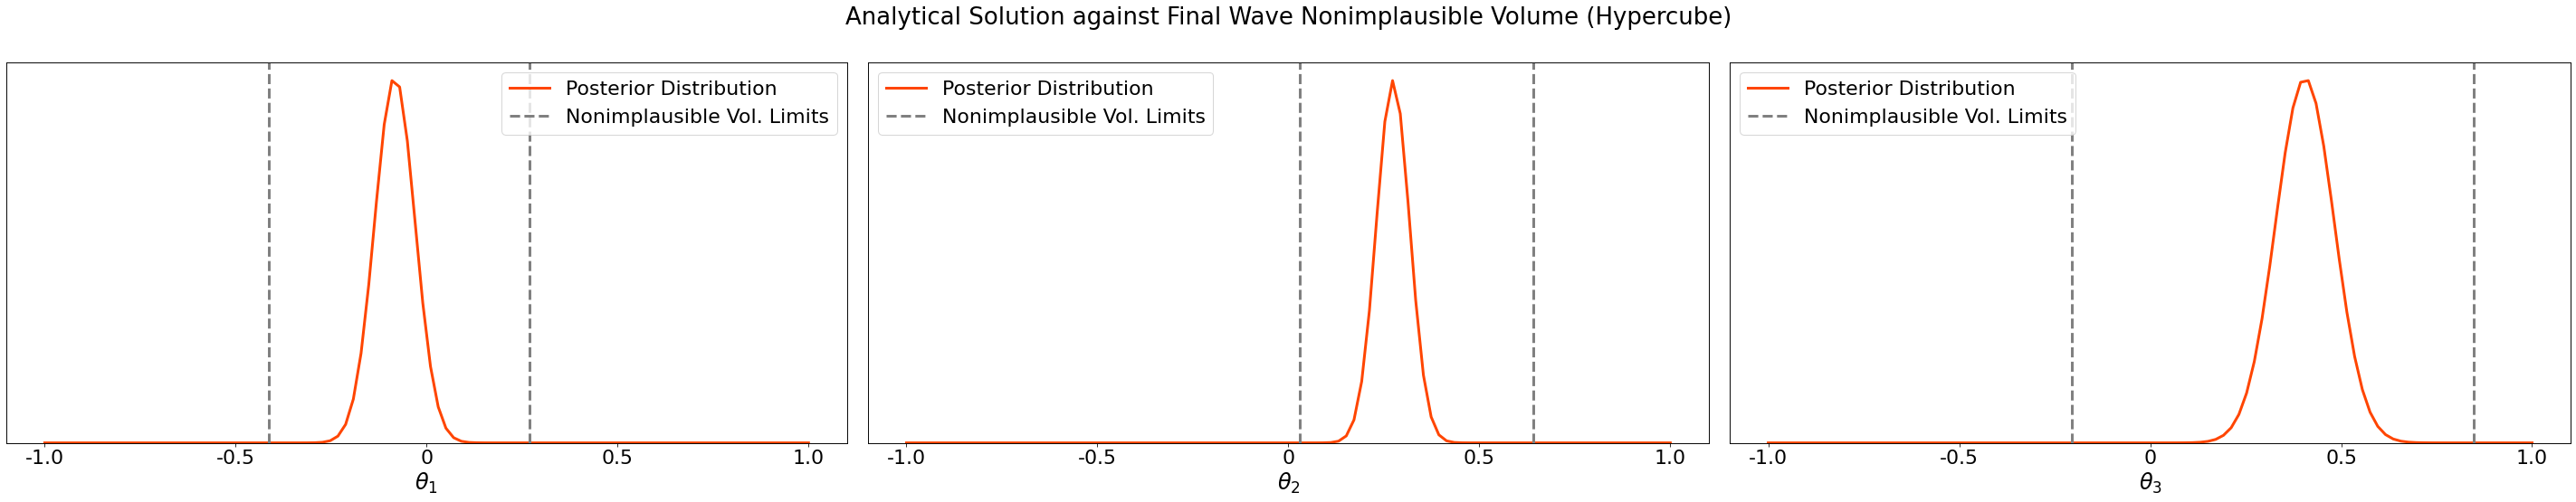

In [13]:
fig, axes = plt.subplots(1,3,figsize=(40,8))
theta_names = [r'$\theta_{1}$', r'$\theta_{2}$', r'$\theta_{3}$']
#ax1_right = ax1.twinx()

for i in range(ndim):
    ax_right = axes[i].twinx()
    print(analytic_mean[i])
    #plot.opticaldepth_1D(final_wave_HC, parameter_bounds[i], i, bins=50, Fig=(fig, axes[i]), plot_kwargs={'color': 'lightblue'})
    ax_right.plot(theta_vals[i], stats.norm.pdf(theta_vals[i], analytic_mean[i], np.sqrt(H[i,i])), color='orangered', linewidth=3, label='Posterior Distribution')
    axes[i].set(yticklabels=[])  
    axes[i].tick_params(left=False)
    ax_right.set(yticklabels=[])  
    ax_right.tick_params(right=False)
    
    min_theta2 = np.min(HC_w2[:,i].T[:-1])
    max_theta2 = np.max(HC_w2[:,i].T[:-1])
    
    min_theta1 = np.min(HC_w1[:,i].T[:-1])
    max_theta1 = np.max(HC_w1[:,i].T[:-1])
    
    min_theta3 = np.min(HC_w3[:,i].T[:-1])
    max_theta3 = np.max(HC_w3[:,i].T[:-1])

    
    #ax_right.axvline(max_theta1, color='cornflowerblue', linestyle='--', linewidth=3, label=r'Wave 1 Nonimplausible Vol. Limits')
    #ax_right.axvline(max_theta2, color='orange', linestyle='--', linewidth=3)
    ax_right.axvline(max_theta3, color='grey', linestyle='--', linewidth=3, label=r'Nonimplausible Vol. Limits')
    
    #ax_right.axvline(min_theta1, color='cornflowerblue', linestyle='--', linewidth=3)
    #ax_right.axvline(min_theta2, color='orange', linestyle='--', linewidth=3)
    ax_right.axvline(min_theta3, color='grey', linestyle='--', linewidth=3)
    
    axes[i].set_ylim([0, None])
    ax_right.set_ylim([0, None])
    #ax_right.set(yticklabels=[])
    
    
    axes[i].set_xlabel(theta_names[i])
    #ax_right.tick_params(right=False)
    
    axes[i].set_xticks([-1,-0.5,0,0.5,1]) 
    axes[i].set_xticklabels([-1.0, -0.5, 0, 0.5, 1.0])
    
    handles, labels = ax_right.get_legend_handles_labels()
    #patch = mpatches.Patch(color='lightblue', label='Optical Depth')
    #handles.append(patch) 
    plt.legend(handles=handles, loc='best')
    
    
fig.suptitle('Analytical Solution against Final Wave Nonimplausible Volume (Hypercube)')
plt.tight_layout()

#plt.savefig('figures/final_1D_plot_HC_2ndI.png', bbox_inches='tight', facecolor='white', transparent=False)


In [14]:
HM_cov_w1 = np.cov(EL_w1.T[:-1])
HM_mean_w1 = np.mean(EL_w1.T[:-1], axis=1)

HM_cov_w2 = np.cov(EL_w2.T[:-1])
HM_mean_w2 = np.mean(EL_w2.T[:-1], axis=1)

HM_cov_w3 = np.cov(EL_w3.T[:-1])
HM_mean_w3 = np.mean(EL_w3.T[:-1], axis=1)

p1 = np.percentile(EL_w3.T[:-1], 2.5, axis=1)
p2 = np.percentile(EL_w3.T[:-1], 97.5, axis=1)


#HM_cov_12 = np.cov(final_wave_EL_12.T[:-1])
#HM_mean_12 = np.mean(final_wave_EL_12.T[:-1], axis=1)

#HM_cov_test = np.cov(final_wave_EL_test.T[:-1])
#HM_mean_test = np.mean(final_wave_EL_test.T[:-1], axis=1)
print(p1)
print(p2)

[-0.30565342  0.13193429 -0.01438099]
[0.15584625 0.52838626 0.66776956]


0.6826999999999999
0.9500000000000001
0.9950000000000001


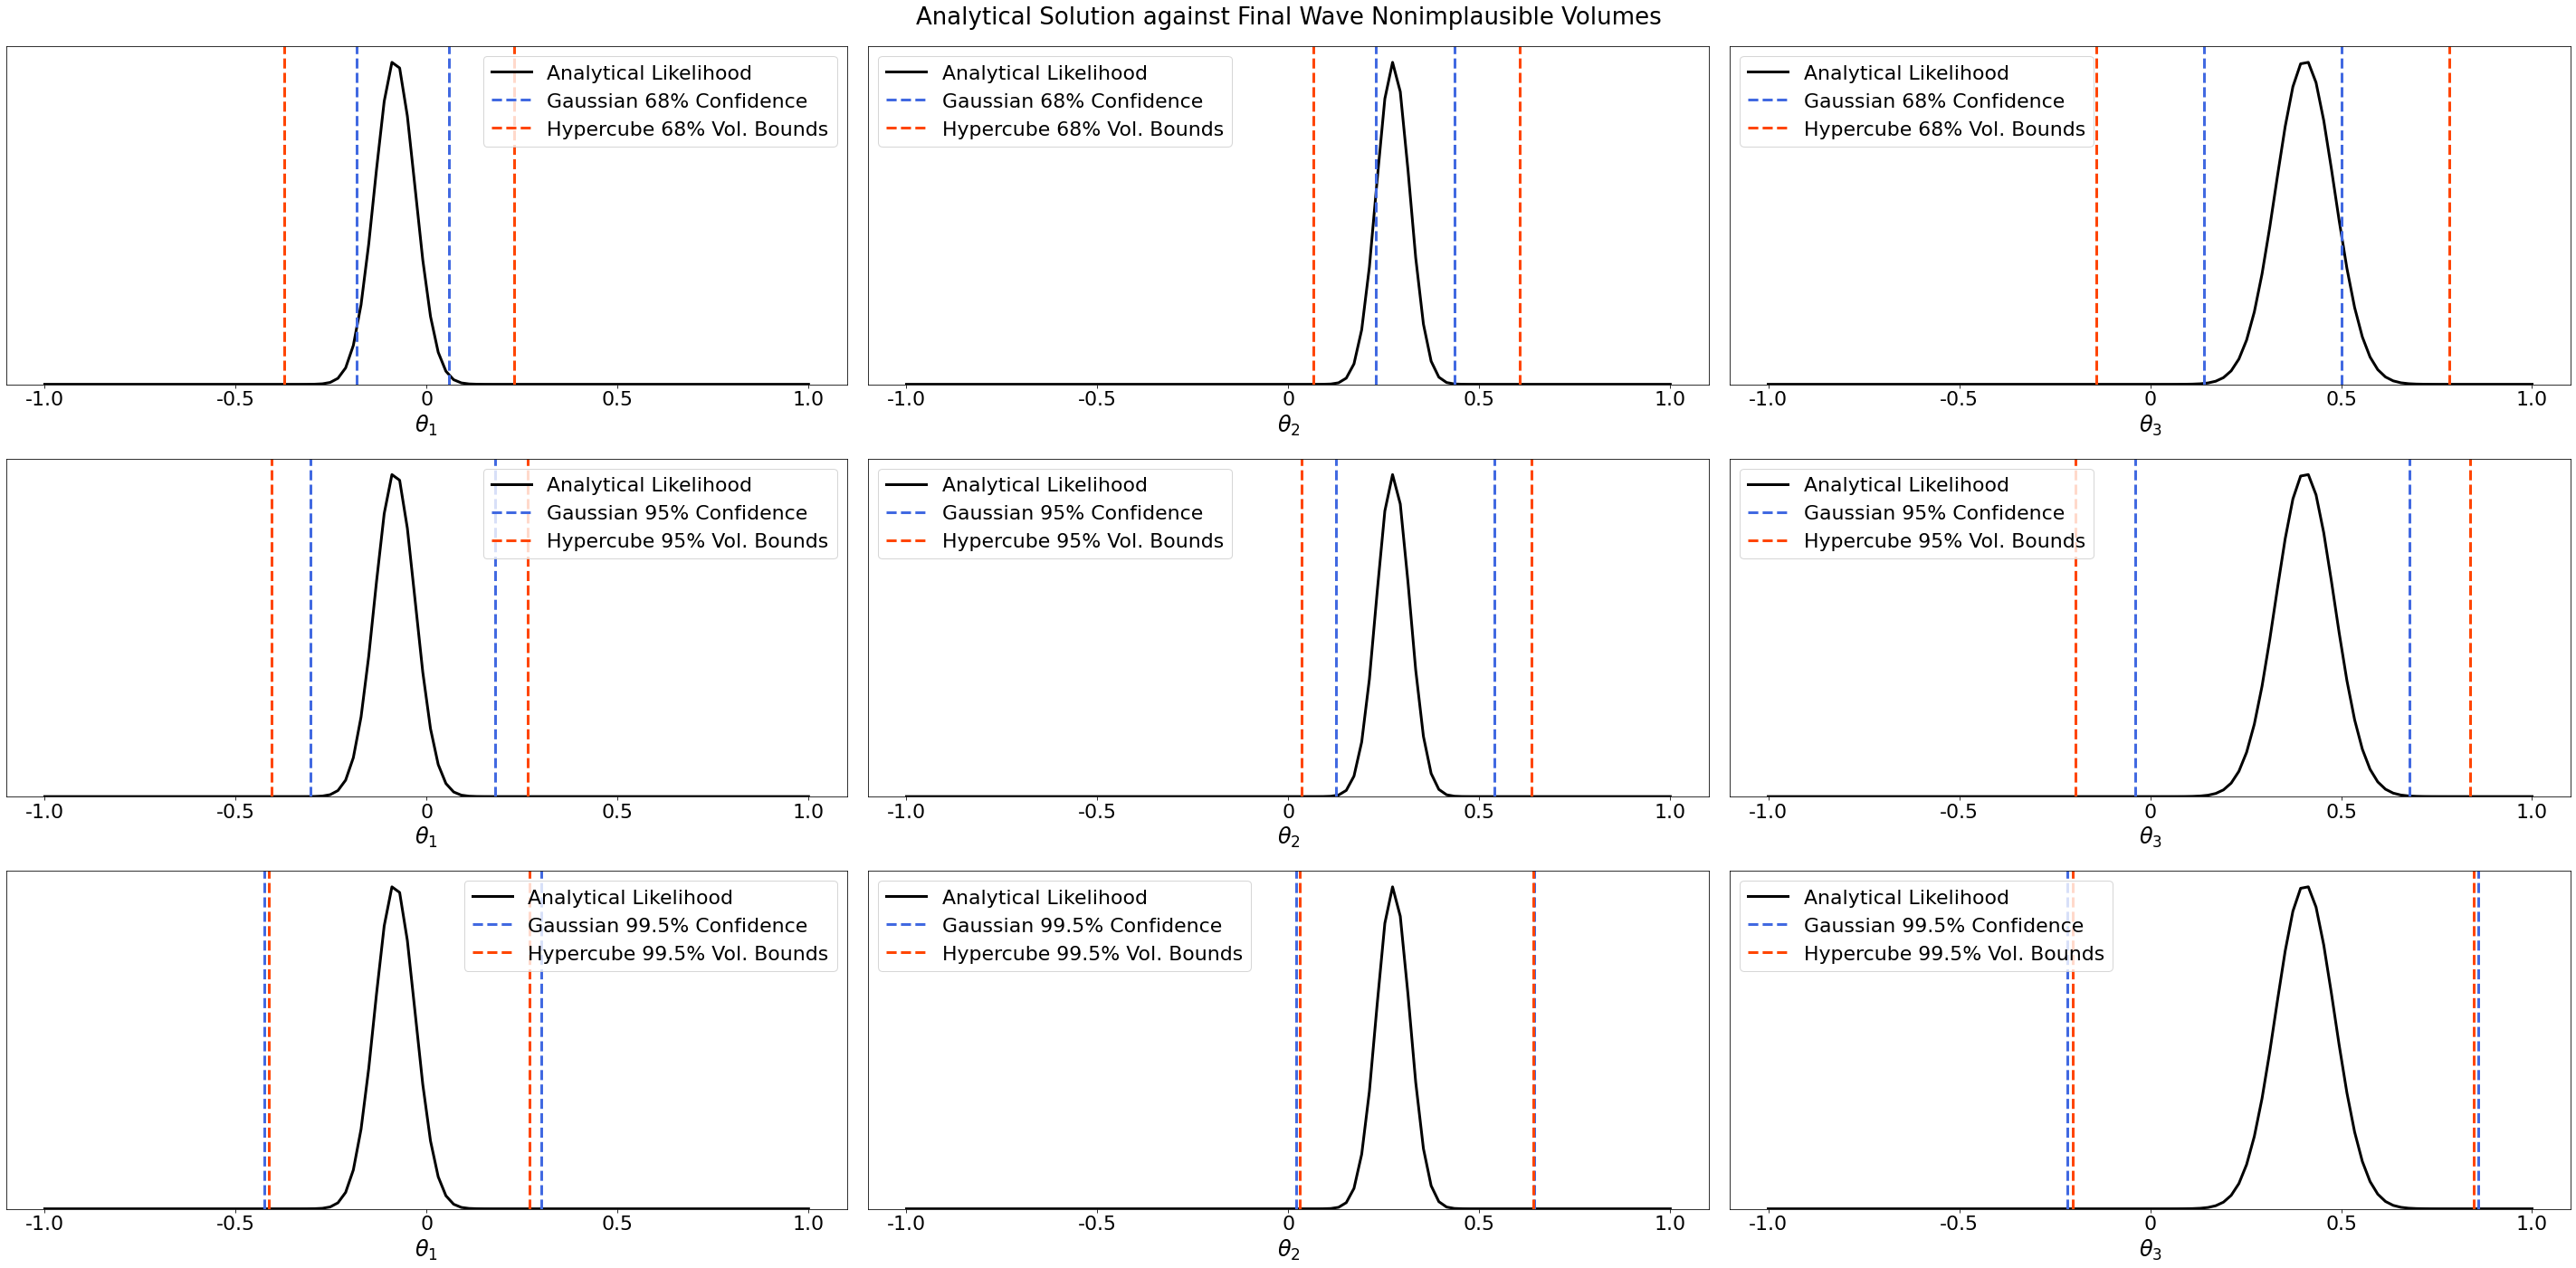

In [195]:
fig, axes = plt.subplots(3,3,figsize=(40,20))
theta_names = [r'$\theta_{1}$', r'$\theta_{2}$', r'$\theta_{3}$']

conf = [0.6827, 0.95, 0.995]
lower_quantiles = [16, 2.5, 0.25]
upper_quantiles = [84, 97.5, 99.75]
percentages = [68, 95, 99.5]


for j in range(3):
    
    vol_i = 1
    vol_reduced = 1
    
    for i in range(ndim):
        #ax_right = axes[i].twinx()
        axes[j,i].plot(theta_vals[i], stats.norm.pdf(theta_vals[i], analytic_mean[i], np.sqrt(H[i,i])), color='black', linewidth=3, label='Analytical Likelihood')
        #ax_right.plot(theta_vals[i], stats.norm.pdf(theta_vals[i], HM_mean_w3[i], np.sqrt(HM_cov_w3[i,i])), color='grey', linestyle='--', linewidth=3, label='Nonimplausible Vol.')

        # gaussian bounds (95%)
        #axes[j,i].axvline(np.percentile(EL_w3.T[:-1], lower_quantiles[j], axis=1)[i], color='royalblue', linewidth=3, linestyle='--', label = r'Gaussian {}% Confidence'.format(percentages[j]))
        #axes[j,i].axvline(np.percentile(EL_w3.T[:-1], upper_quantiles[j], axis=1)[i], color='royalblue', linewidth=3, linestyle='--')
        
        confidence_interval = stats.norm.interval(alpha=conf[j], loc=HM_mean_w3[i], scale=np.sqrt(HM_cov_w3[i,i]))
        #axes[j,i].axvline(confidence_interval[0], color='royalblue', linewidth=3, linestyle='--', label = r'Gaussian {}% Confidence'.format(percentages[j]))
        #axes[j,i].axvline(confidence_interval[1], color='royalblue', linewidth=3, linestyle='--', label = r'Gaussian {}% Confidence'.format(percentages[j]))
        
        
        
        axes[j,i].axvline(HM_mean_w3[i]-((j+1)*np.sqrt(HM_cov_w3[i,i])), color='royalblue', linewidth=3, linestyle='--', label = r'Gaussian {}% Confidence'.format(percentages[j]))
        axes[j,i].axvline(HM_mean_w3[i]+((j+1)*np.sqrt(HM_cov_w3[i,i])), color='royalblue', linewidth=3, linestyle='--')
        # plot 95% hypercube bounds
        min_theta3 = np.min(HC_w3[:,i].T[:-1]) * (conf[j]**(1/3))
        
        range_i = (np.max(HC_w3[:,i].T[:-1]) - np.min(HC_w3[:,i].T[:-1]))
        range_reduced = (np.max(HC_w3[:,i].T[:-1]) - np.min(HC_w3[:,i].T[:-1]))*(conf[j]**(1/3))

        max_theta3 = np.max(HC_w3[:,i].T[:-1]) - ((range_i - range_reduced)/2)
        min_theta3 = np.min(HC_w3[:,i].T[:-1]) + ((range_i - range_reduced)/2)
        
        vol_i *= range_i
        vol_reduced *= (max_theta3 - min_theta3)
        axes[j,i].axvline(max_theta3, color='orangered', linestyle='--', linewidth=3, label=r'Hypercube {}% Vol. Bounds'.format(percentages[j]))
        axes[j,i].axvline(min_theta3, color='orangered', linestyle='--', linewidth=3)

        axes[j,i].set(yticklabels=[])  
        axes[j,i].tick_params(left=False)
        #ax_right.set(yticklabels=[])  
        #ax_right.tick_params(right=False)

        axes[j,i].set_ylim([0, None])
        #ax_right.set_ylim([0, None])

        axes[j,i].set_xlabel(theta_names[i])
        #ax_right.tick_params(right=False)

        axes[j,i].set_xticks([-1,-0.5,0,0.5,1]) 
        axes[j,i].set_xticklabels([-1.0, -0.5, 0, 0.5, 1.0])

        #lines, labels = ax_right.get_legend_handles_labels()
        #axes[j,i].legend(lines + lines2, labels + labels2, loc=0)
        axes[j,i].legend(loc=0)
        
    print(vol_reduced/vol_i)

    
    
fig.suptitle('Analytical Solution against Final Wave Nonimplausible Volumes')
plt.tight_layout()

plt.savefig('figures/final_volumes_1d.png', bbox_inches='tight', facecolor='white', transparent=False)



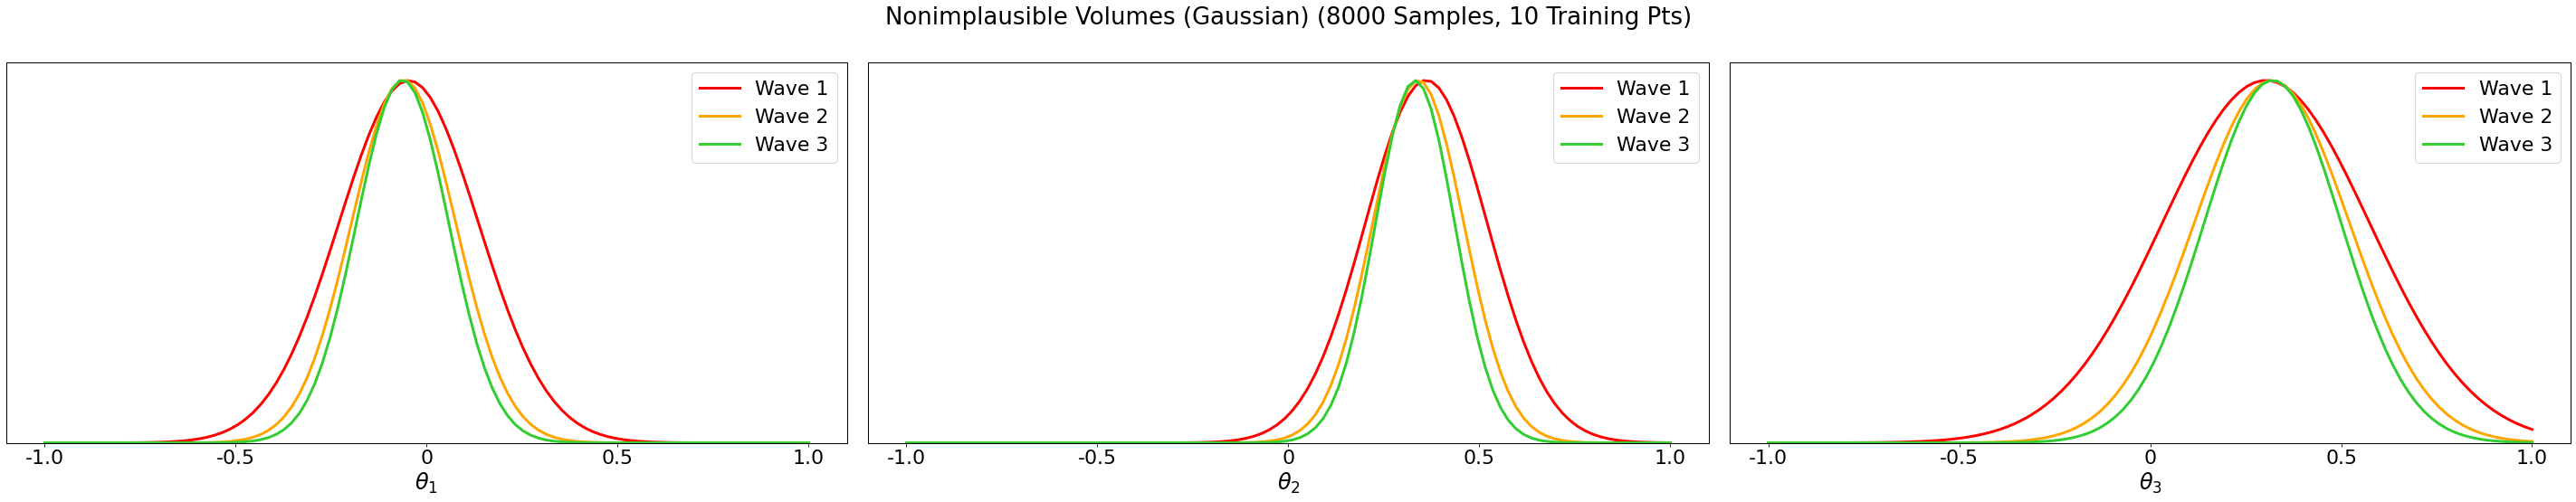

In [20]:
fig, axes = plt.subplots(1,3,figsize=(40,8))
theta_names = [r'$\theta_{1}$', r'$\theta_{2}$', r'$\theta_{3}$']

for i in range(ndim):
    ax_right = axes[i].twinx()
    ax_right2 = axes[i].twinx()
    ax_right3 = axes[i].twinx()
    ax_right4 = axes[i].twinx()

    ax_right2.plot(theta_vals[i], stats.norm.pdf(theta_vals[i], HM_mean_w1[i], np.sqrt(HM_cov_w1[i,i])), color='red', linewidth=3, label='Wave 1')
    ax_right3.plot(theta_vals[i], stats.norm.pdf(theta_vals[i], HM_mean_w2[i], np.sqrt(HM_cov_w2[i,i])), color='orange', linewidth=3, label='Wave 2')
    ax_right4.plot(theta_vals[i], stats.norm.pdf(theta_vals[i], HM_mean_w3[i], np.sqrt(HM_cov_w3[i,i])), color='limegreen', linewidth=3, label='Wave 3')
    
    axes[i].set(yticklabels=[])  
    axes[i].tick_params(left=False)
    ax_right.set(yticklabels=[])  
    ax_right.tick_params(right=False)
    ax_right2.set(yticklabels=[])  
    ax_right2.tick_params(right=False)
    ax_right3.set(yticklabels=[])  
    ax_right3.tick_params(right=False)
    ax_right4.set(yticklabels=[])  
    ax_right4.tick_params(right=False)
    
    axes[i].set_ylim([0, None])
    ax_right.set_ylim([0, None])
    ax_right2.set_ylim([0, None])
    ax_right3.set_ylim([0, None])
    ax_right4.set_ylim([0, None])
    #ax_right.set(yticklabels=[])
    
    
    axes[i].set_xlabel(theta_names[i])
    #ax_right.tick_params(right=False)
    
    axes[i].set_xticks([-1,-0.5,0,0.5,1]) 
    axes[i].set_xticklabels([-1.0, -0.5, 0, 0.5, 1.0])
    
    lines, labels = ax_right2.get_legend_handles_labels()
    lines2, labels2 = ax_right3.get_legend_handles_labels()
    lines3, labels3 = ax_right4.get_legend_handles_labels()
    #lines.append(mpatches.Patch(color='lightblue'))
    #labels.append('Optical Depth')
    ax_right2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc=0)

    
    
fig.suptitle('Nonimplausible Volumes (Gaussian) (8000 Samples, 10 Training Pts)')
plt.tight_layout()

#plt.savefig('figures/wave_plots_EL_5pts.png', bbox_inches='tight', facecolor='white', transparent=False)

In [219]:
# calculate ellipsoid

# Find and sort eigenvalues to correspond to the covariance matrix
eigvals, eigvecs = np.linalg.eigh(np.cov(EL_w3[:,:-1].T))
idx = np.sum(np.cov(EL_w3[:,:-1].T),axis=0).argsort()
eigvals_temp = eigvals[idx]
idx = eigvals_temp.argsort()
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]

# Set of all spherical angles to draw our ellipsoid
n_points = 100
theta = np.linspace(0, 2*np.pi, n_points)
phi = np.linspace(0, np.pi, n_points)

# Width, height and depth of ellipsoid

#rx, ry, rz = np.sqrt(12.838) * np.sqrt(eigvals)
#rx, ry, rz = 3 * np.sqrt(eigvals)
rx, ry, rz = np.sqrt(7.815) * np.sqrt(eigvals)


# Get the xyz points for plotting
# Cartesian coordinates that correspond to the spherical angles:
X = rx * np.outer(np.cos(theta), np.sin(phi))
Y = ry * np.outer(np.sin(theta), np.sin(phi))
Z = rz * np.outer(np.ones_like(theta), np.cos(phi))

# Rotate ellipsoid for off axis alignment
old_shape = X.shape
# Flatten to vectorise rotation
X,Y,Z = X.flatten(), Y.flatten(), Z.flatten()
X,Y,Z = np.matmul(eigvecs, np.array([X,Y,Z]))
X,Y,Z = X.reshape(old_shape), Y.reshape(old_shape), Z.reshape(old_shape)
   
# Add in offsets for the mean
X = X + HM_mean_w3[0]
Y = Y + HM_mean_w3[1]
Z = Z + HM_mean_w3[2]

print(np.pi*(4/3)*rx*ry*rz)





0.0873361045165671


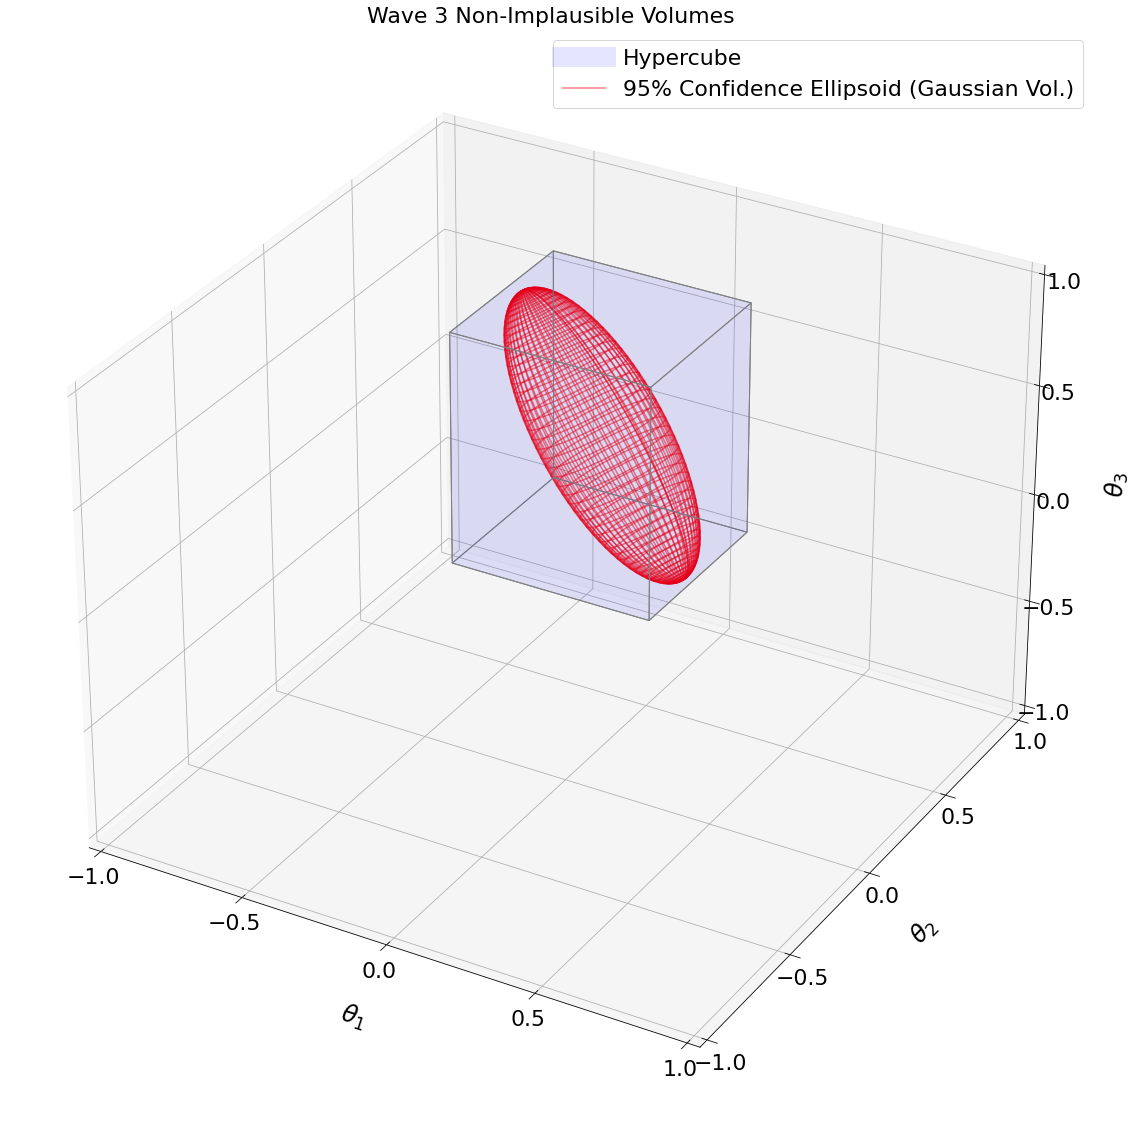

In [228]:
# plot cube and ellipsoid

from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

min_theta3 = np.min(HC_w3[:,i].T[:-1]) * (conf[j]**(1/3))
        
#xrange_i = (max_x - min_x)
#xrange_reduced = (max_x - min_x)*(conf[j]**(1/3))
#yrange_i = (max_x - min_x)
#yrange_reduced = (max_x - min_x)*(conf[j]**(1/3))
#yrange_i = (max_x - min_x)
#yrange_reduced = (max_x - min_x)*(conf[j]**(1/3))


min_x = np.min(HC_w3[:,0].T[:-1])
max_x = np.max(HC_w3[:,0].T[:-1])
min_y = np.min(HC_w3[:,1].T[:-1])
max_y = np.max(HC_w3[:,1].T[:-1])
min_z = np.min(HC_w3[:,2].T[:-1])
max_z = np.max(HC_w3[:,2].T[:-1])


    
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')

cube_definition = [(min_x,min_y,min_z), (min_x,max_y,min_z), (max_x,min_y,min_z), (min_x,min_y,max_z)]
cube_definition_array = [np.array(list(item)) for item in cube_definition]

points = []
points += cube_definition_array
vectors = [
    cube_definition_array[1] - cube_definition_array[0],
    cube_definition_array[2] - cube_definition_array[0],
    cube_definition_array[3] - cube_definition_array[0]
]

points += [cube_definition_array[0] + vectors[0] + vectors[1]]
points += [cube_definition_array[0] + vectors[0] + vectors[2]]
points += [cube_definition_array[0] + vectors[1] + vectors[2]]
points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

points = np.array(points)

edges = [
    [points[0], points[3], points[5], points[1]],
    [points[1], points[5], points[7], points[4]],
    [points[4], points[2], points[6], points[7]],
    [points[2], points[6], points[3], points[0]],
    [points[0], points[2], points[4], points[1]],
    [points[3], points[6], points[7], points[5]]
]

ax.plot_wireframe(X,Y,Z, color='r', alpha=0.5, label='95% Confidence Ellipsoid (Gaussian Vol.)')
faces = Poly3DCollection(edges, linewidths=1, edgecolors='grey', alpha=0.05)
faces.set_facecolor((0,0,1,0.1))

ax.add_collection3d(faces)

ax.plot(5,5,label='Hypercube',linewidth=20,color=(0,0,1,0.1))


ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

ax.xaxis.labelpad=30
ax.yaxis.labelpad=30
ax.zaxis.labelpad=30

ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_zticks([-1,-0.5,0,0.5,1])

ax.set_ylabel(labels[1])
ax.set_xlabel(labels[0],linespacing=3.2)
ax.set_zlabel(labels[2],linespacing=3.2)

ax.legend(loc='best')

ax.set_title('Wave 3 Non-Implausible Volumes')
#ax.view_init(90, 270)
plt.savefig('figures/final_volumes_3d.png', bbox_inches='tight', facecolor='white', transparent=False)

[[ 0.01457145 -0.00285967]
 [-0.00285967  0.01073315]]


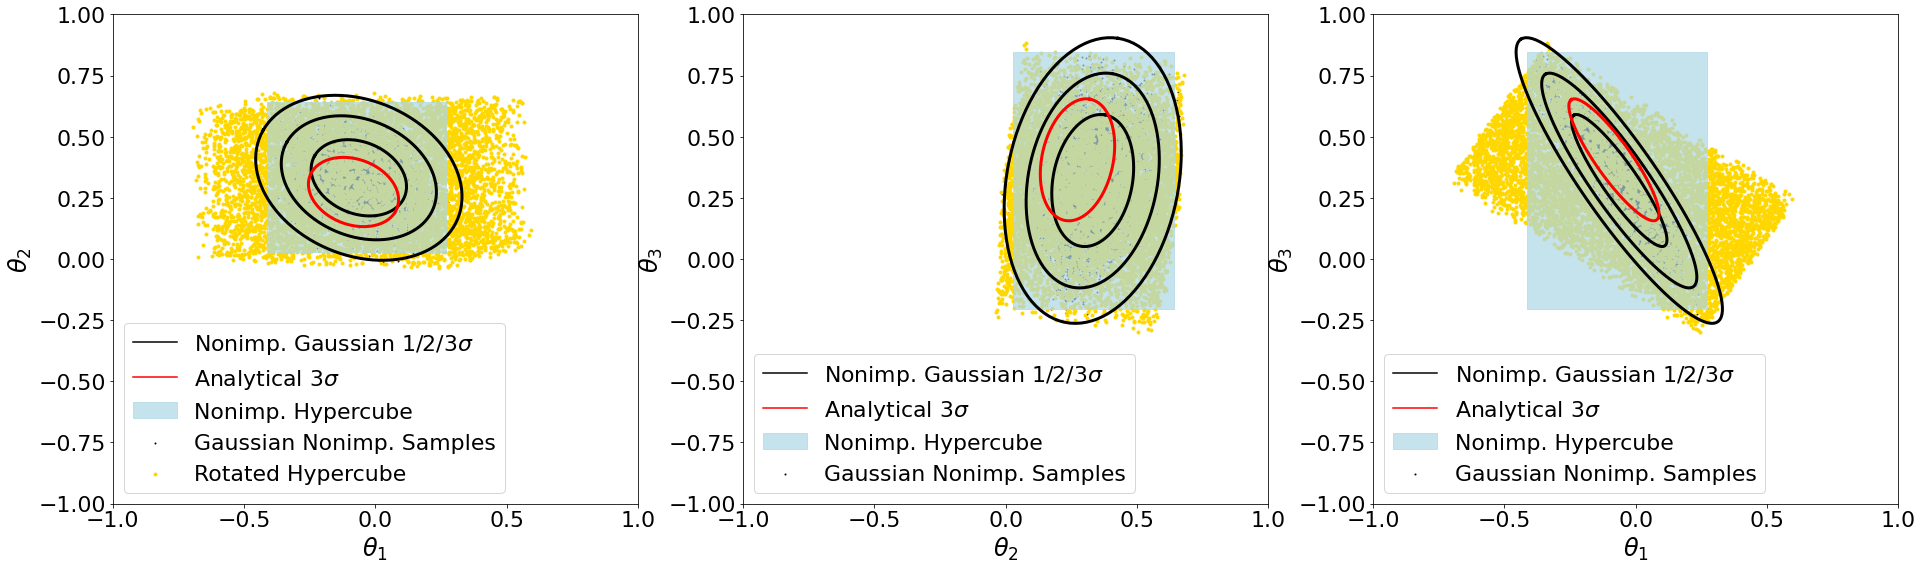

In [274]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(32,9))

labels=(r'$\theta_{1}$', r'$\theta_{2}$', r'$\theta_{3}$')

print(np.cov(EL_w3[:,:-2].T))

el_cov = np.cov(EL_w3[:,:-1].T)
cov_12 = np.array([[el_cov[0,0],el_cov[0,1]],[el_cov[1,0],el_cov[1,1]]])
cov_13 = np.array([[el_cov[0,0],el_cov[0,2]],[el_cov[2,0],el_cov[2,2]]])
cov_23 = np.array([[el_cov[1,1],el_cov[1,2]],[el_cov[2,1],el_cov[2,2]]])

ax1.scatter(EL_w3[:,0], EL_w3[:,1], color='black', s=1, label='Gaussian Nonimp. Samples')
ax2.scatter(EL_w3[:,1], EL_w3[:,2], color='black', s=1, label='Gaussian Nonimp. Samples')
ax3.scatter(EL_w3[:,0], EL_w3[:,2], color='black', s=1, label='Gaussian Nonimp. Samples')

ax1.scatter(HC_r[16000:][:,0], HC_r[16000:][:,1], color='gold', s=9, label='Rotated Hypercube')
ax2.scatter(HC_r[16000:][:,1], HC_r[16000:][:,2], color='gold', s=9)
ax3.scatter(HC_r[16000:][:,0], HC_r[16000:][:,2], color='gold', s=9)


get_cov_ellipse(cov_12, [HM_mean_w3[0],HM_mean_w3[1]], 3, 2.26377, ax1, 'black')
get_cov_ellipse(cov_12, [HM_mean_w3[0],HM_mean_w3[1]], 3, 5.991, ax1, 'black')
get_cov_ellipse(cov_12, [HM_mean_w3[0],HM_mean_w3[1]], 3, 10.597, ax1, 'black')
ax1.add_patch(Rectangle((min_x, min_y), (max_x-min_x), (max_y-min_y),color='lightblue',alpha=0.7,label='Nonimp. Hypercube'))

get_cov_ellipse(cov_23, [HM_mean_w3[1],HM_mean_w3[2]], 3, 2.26377, ax2, 'black')
get_cov_ellipse(cov_23, [HM_mean_w3[1],HM_mean_w3[2]], 3, 5.991, ax2, 'black')
get_cov_ellipse(cov_23, [HM_mean_w3[1],HM_mean_w3[2]], 3, 10.597, ax2, 'black')
ax2.add_patch(Rectangle((min_y, min_z), (max_y-min_y), (max_z-min_z),color='lightblue',alpha=0.7,label='Nonimp. Hypercube'))

get_cov_ellipse(cov_13, [HM_mean_w3[0],HM_mean_w3[2]], 3, 2.26377, ax3, 'black')
get_cov_ellipse(cov_13, [HM_mean_w3[0],HM_mean_w3[2]], 3, 5.991, ax3, 'black')
get_cov_ellipse(cov_13, [HM_mean_w3[0],HM_mean_w3[2]], 3, 10.597, ax3, 'black')
ax3.add_patch(Rectangle((min_x, min_z), (max_x-min_x), (max_z-min_z),color='lightblue',alpha=0.7,label='Nonimp. Hypercube'))


get_cov_ellipse(np.array([[H[0,0], H[0,1]],[H[1,0], H[1,1]]]), [analytic_mean[0], analytic_mean[1]], 3, 10.597, ax1, color = 'red')
get_cov_ellipse(np.array([[H[0,0], H[0,2]],[H[2,0], H[2,2]]]), [analytic_mean[0], analytic_mean[2]], 3, 10.597, ax3, color = 'red')
get_cov_ellipse(np.array([[H[1,1], H[1,2]],[H[2,1], H[2,2]]]), [analytic_mean[1], analytic_mean[2]], 3, 10.597, ax2, color = 'red')


ax1.set_xlabel(labels[0])
ax1.set_ylabel(labels[1])
ax2.set_xlabel(labels[1])
ax2.set_ylabel(labels[2])
ax3.set_xlabel(labels[0])
ax3.set_ylabel(labels[2])

ax1.plot(0,0.9,label=r'Nonimp. Gaussian $1/2/3\sigma$', color='black')
ax1.plot(0,0.8,label=r'Analytical $3\sigma$', color='red')
ax2.plot(0,0.9,label=r'Nonimp. Gaussian $1/2/3\sigma$', color='black')
ax2.plot(0,0.8,label=r'Analytical $3\sigma$', color='red')
ax3.plot(0,0.9,label=r'Nonimp. Gaussian $1/2/3\sigma$', color='black')
ax3.plot(0,0.8,label=r'Analytical $3\sigma$', color='red')


ax1.set_xlim([-1,1])
ax1.set_ylim([-1,1])
ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])
ax3.set_xlim([-1,1])
ax3.set_ylim([-1,1])

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')

#plt.savefig('figures/final_volumes_2d.png', bbox_inches='tight', facecolor='white', transparent=False)


In [24]:
# hypercube volumes

initial_volume = 2**ndim

volume_hypercube_1 = 1
for i in range(ndim):
    min_theta = np.min(HC_w1[:,i].T[:-1])
    max_theta = np.max(HC_w1[:,i].T[:-1])
    
    volume_hypercube_1 *= (max_theta-min_theta)
    
print('wave 1: ' + str((volume_hypercube_1/initial_volume)*100))

volume_hypercube_2 = 1
for i in range(ndim):
    min_theta = np.min(HC_w2[:,i].T[:-1])
    max_theta = np.max(HC_w2[:,i].T[:-1])
    
    volume_hypercube_2 *= (max_theta-min_theta)
    
print('wave 2: ' + str((volume_hypercube_2/initial_volume)*100))

volume_hypercube_3 = 1
for i in range(ndim):
    min_theta = np.min(HC_w3[:,i].T[:-1])
    max_theta = np.max(HC_w3[:,i].T[:-1])
    
    volume_hypercube_3 *= (max_theta-min_theta)
    
print('wave 3: ' + str((volume_hypercube_3/initial_volume)*100))

wave 1: 10.552155081445312
wave 2: 5.920293226294901
wave 3: 5.487166714415186


In [25]:
# volume calculations

# hyperellipse (https://online.stat.psu.edu/stat505/lesson/4/4.6)
    
initial_volume = 2**3

def volume_ellipse(cov, p):
    
    # find axes lengths
    eigvals, eigvecs = np.linalg.eigh(cov)
    idx = np.sum(cov).argsort()
    eigvals_temp = eigvals[idx]
    idx = eigvals_temp.argsort()
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]

    # Set of all spherical angles to draw our ellipsoid
    n_points = 100
    theta = np.linspace(0, 2*np.pi, n_points)
    phi = np.linspace(0, np.pi, n_points)

    # Width, height and depth of ellipsoid
    #axes = np.sqrt(12.838) * np.sqrt(eigvals) # 99.5
    axes = np.sqrt(7.815) * np.sqrt(eigvals) # 95

    
    vol = (np.pi**(p/2))*2*np.prod(axes)
    
    
    if p == 3:
        return vol / (p * np.sqrt(np.pi)/2)
    elif p == 4:
        return vol / (p*2)

volume_ellipsoid_1 = volume_ellipse(np.cov(EL_w1[:,:-1].T),3)
print('wave 1: ' + str((volume_ellipsoid_1/initial_volume)*100))

volume_ellipsoid_2 = volume_ellipse(np.cov(EL_w2[:,:-1].T),3)
print('wave 2: ' + str((volume_ellipsoid_2/initial_volume)*100))

volume_ellipsoid_3 = volume_ellipse(np.cov(EL_w3[:,:-1].T),3)
print('wave 3: ' + str((volume_ellipsoid_3/initial_volume)*100))

wave 1: 8.963227831215358
wave 2: 7.124547803817347
wave 3: 6.514165674931076


In [ ]:
0.2945286778504185



volume_ellipsoid_1 = volume_ellipse(np.cov(EL_w1[:,:-1].T),3)
print('wave 1 (hyper_rot): ' + str((volume_ellipsoid_1/initial_volume)*100))

volume_ellipsoid_2 = volume_ellipse(np.cov(EL_w2[:,:-1].T),3)
print('wave 2: ' + str((volume_ellipsoid_2/initial_volume)*100))

volume_ellipsoid_3 = volume_ellipse(np.cov(EL_w3[:,:-1].T),3)
print('wave 3: ' + str((volume_ellipsoid_3/initial_volume)*100))

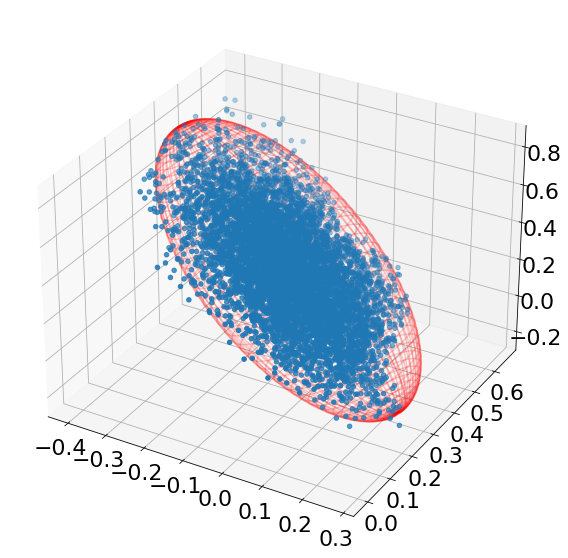

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(X,Y,Z, color='r', alpha=0.2)
#ax.scatter(HC_w3[:,0], HC_w3[:,1], HC_w3[:,2])
ax.scatter(EL_w3[:,0], EL_w3[:,1], EL_w3[:,2])

#test = np.random.multivariate_normal(HM_mean_w3, HM_cov_w3, size=20000)

#ax.scatter(test[:,0], test[:,1], test[:,2], color='black')

In [ ]:
print(100 * HC_w1.shape[0] / 8000)
print(100 * HC_w2.shape[0] / 8000)
print(100 * HC_w3.shape[0] / 8000)

print(100 * EL_w1.shape[0] / 8000)
print(100 * EL_w2.shape[0] / 8000)
print(100 * EL_w3.shape[0] / 8000)


(-1.0, 1.0)

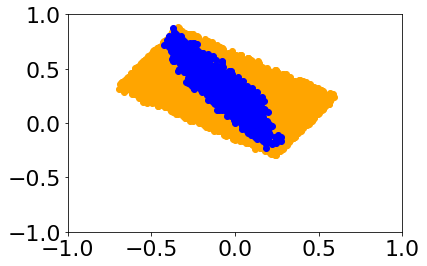

In [270]:
fig, ax = plt.subplots()
ax.scatter(HC_r[16000:][:,0],HC_r[16000:][:,2],color='orange')
ax.scatter(HC_w2[:,0],HC_w2[:,2],color='blue')

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])


In [ ]:


ToyModel = historymatch.Simulator(HM)
ToyModel.set_simulator(toy_model)

HM.set_observations(obs_data, np.sqrt(var_obs))
HM.initialize_volume([-1,-1,-1], [1,1,1])

results = HM.run(nwaves=nwaves)

(3, 2)
(3, 2)
Running wave 1
Emulating output 0...
Emulating output 1...
Emulating output 2...
Emulating output 3...
Emulating output 4...
Emulating output 5...
Emulating output 6...
Emulating output 7...
Emulating output 8...
Emulating output 9...
(8000, 4)
(151, 4)
x :1.3419525391628981
y :0.6575463207755594
z :0.6811412006102471
(3, 2)
(3, 2)
Convergence : False
x :1.3419525391628981
y :0.6575463207755594
z :0.6811412006102471
(3, 2)
(3, 2)
Relative nonimplausible volume remaining: -0.005
Running wave 2
Emulating output 0...
Emulating output 1...
Emulating output 2...
Emulating output 3...
Emulating output 4...
Emulating output 5...
Emulating output 6...


In [261]:
#1.3419525391628981
#0.6575463207755594
#0.6811412006102471

#1.1392769501182456
#0.6278488932900468
#0.6103295312948456

#
#
#

print(100*(1.1392769501182456*0.6278488932900468*0.6103295312948456)/(2**ndim))

5.4570614096920185
